In [19]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from tabulate import tabulate

In [20]:
arr2345_uc = np.load("../../misc/arr2345_uncalibrated.npy")
arr2345_c = np.load("../../misc/arr2345_calibrated.npy")
arr1_uc = np.load("../../misc/arr1_uncalibrated.npy")
arr1_c = np.load("../../misc/arr1_calibrated.npy")

In [21]:
# current smoking groups

uc_all = np.sum(arr1_uc[:,15]) + np.sum(arr2345_uc[:,15])
c_all = np.sum(arr1_c[:,15]) + np.sum(arr2345_c[:,15])

r1 = ["calibrated?", "% state 1", "% state 2", "% state 3", "% state 4", "% state 5"]
r2 = [
        "uncalibrated",
        f"{np.around(np.sum(arr1_uc[:,15]) / uc_all * 100, decimals=4)}%",
        f"{np.around(np.sum(arr2345_uc[arr2345_uc[:,5] == 1][:,15]) / uc_all * 100, decimals=4)}%",
        f"{np.around(np.sum(arr2345_uc[arr2345_uc[:,6] == 1][:,15]) / uc_all * 100, decimals=4)}%",
        f"{np.around(np.sum(arr2345_uc[arr2345_uc[:,7] == 1][:,15]) / uc_all * 100, decimals=4)}%",
        f"{np.around(np.sum(arr2345_uc[np.sum(arr2345_uc[:,5:8], axis=1) == 0][:,15]) / uc_all * 100, decimals=4)}%",
    ]
r3 = [
        "calibrated",
        f"{np.around(np.sum(arr1_c[:,15]) / c_all * 100, decimals=4)}%",
        f"{np.around(np.sum(arr2345_c[arr2345_c[:,5] == 1][:,15]) / c_all * 100, decimals=4)}%",
        f"{np.around(np.sum(arr2345_c[arr2345_c[:,6] == 1][:,15]) / c_all * 100, decimals=4)}%",
        f"{np.around(np.sum(arr2345_c[arr2345_c[:,7] == 1][:,15]) / c_all * 100, decimals=4)}%",
        f"{np.around(np.sum(arr2345_c[np.sum(arr2345_c[:,5:8], axis=1) == 0][:,15]) / c_all * 100, decimals=4)}%",
    ]

In [22]:
print(tabulate([r1, r2, r3], headers='firstrow', ))

calibrated?    % state 1    % state 2    % state 3    % state 4    % state 5
-------------  -----------  -----------  -----------  -----------  -----------
uncalibrated   58.5673%     19.4837%     7.0247%      11.3808%     3.5435%
calibrated     60.9173%     20.2654%     5.7752%      9.3564%      3.6857%


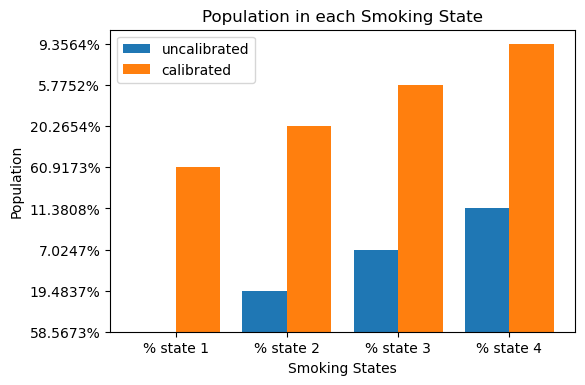

In [23]:
X = r1[1:-1]
ucdata = r2[1:-1]
cdata = r3[1:-1]

X_axis = np.arange(len(X))

plt.figure(num=1, figsize=(6,4), dpi=100)
plt.bar(X_axis-0.2, ucdata, 0.4, label = "uncalibrated")
plt.bar(X_axis+0.2, cdata, 0.4, label = "calibrated")

plt.xticks(X_axis, X)
plt.xlabel("Smoking States")
plt.ylabel("Population")
plt.title("Population in each Smoking State")
plt.legend()
plt.show()

In [24]:
# Percentage smokers

r1 = ["calibrated?", "% smoker", "% menthol among smokers", "% nonmenthol among smokers"]
uc_smoker = np.sum(arr2345_uc[:,15][np.sum(arr2345_uc[:,6:8], axis=1) > 0.5])
uc_menthol = np.sum(arr2345_uc[:,15] * arr2345_uc[:,6])
uc_all = np.sum(arr1_uc[:,15]) + np.sum(arr2345_uc[:,15])
r2 = ["uncalibrated", f"{np.around(uc_smoker / uc_all * 100.0, decimals=4)}%",
     f"{np.around(uc_menthol / uc_smoker * 100, decimals=4)}%", f"{np.around((1 - (uc_menthol / uc_smoker)) * 100, decimals=4)}%"]
c_smoker = np.sum(arr2345_c[:,15][np.sum(arr2345_c[:,6:8], axis=1) > 0.5])
c_menthol = np.sum(arr2345_c[:,15] * arr2345_c[:,6])
c_all = np.sum(arr1_c[:,15]) + np.sum(arr2345_c[:,15])
r3 = ["calibrated", f"{np.around(c_smoker / c_all * 100.0, decimals=4)}%",
     f"{np.around(c_menthol / c_smoker * 100, decimals=4)}%", f"{np.around((1 - (c_menthol / c_smoker)) * 100, decimals=4)}%"]

In [25]:
print(tabulate([r1, r2, r3], headers='firstrow'))

calibrated?    % smoker    % menthol among smokers    % nonmenthol among smokers
-------------  ----------  -------------------------  ----------------------------
uncalibrated   18.4055%    38.1663%                   61.8337%
calibrated     15.1316%    38.1663%                   61.8337%


In [26]:
# age

np.mean(arr2345_uc[:,15])
ages_uc = []
for row in arr2345_uc:
    for _ in range(int(row[15]) // 100):
        ages_uc.append(row[11])
for row in arr1_uc:
    for _ in range(int(row[15]) // 100):
        ages_uc.append(row[11])

ages_c = []
for row in arr2345_c:
    for _ in range(int(row[15]) // 100):
        ages_c.append(row[11])
for row in arr1_c:
    for _ in range(int(row[15]) // 100):
        ages_c.append(row[11])


In [27]:
arr_all_uc = np.concatenate([arr2345_uc, arr1_uc], axis=0)
arr_all_c = np.concatenate([arr2345_c, arr1_c], axis=0)

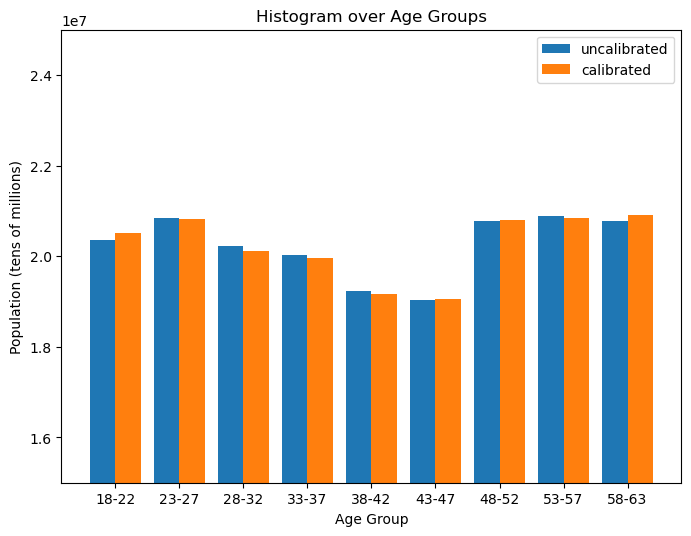

In [28]:

plt.figure(num=1, figsize=(8,6), dpi=100)
plt.hist(
    (arr_all_uc[:,11], 
    arr_all_c[:,11]), 
    bins=[18,23,28,33,38,43,48,53,58,63], 
    weights=(arr_all_uc[:,15], arr_all_c[:,15]),
    label=["uncalibrated", "calibrated"]
)
plt.ylim(1.5e7, 2.5e7)
plt.legend()
plt.ylabel("Population (tens of millions)")
plt.xlabel("Age Group")
plt.title("Histogram over Age Groups")

plt.xticks(
    [20.5, 25.5,30.5,35.5,40.5,45.5,50.5,55.5,60.5],
    ["18-22", "23-27", "28-32", "33-37", "38-42", "43-47", "48-52", "53-57", "58-63"]
)
plt.show()

In [29]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, np.sqrt(variance))

In [30]:
# avg and stddev of age

r1 = ["calibrated?", "average age", "stddev of age"]
avg_uc, stddev_uc = weighted_avg_and_std(arr_all_uc[:,11], arr_all_uc[:,15])
r2 = ["uncalibrated", avg_uc, stddev_uc]
avg_c, stddev_c = weighted_avg_and_std(arr_all_c[:,11], arr_all_c[:,15])
r3 = ["calibrated", avg_c, stddev_c]

In [31]:
print(tabulate([r1, r2, r3], headers='firstrow'))

calibrated?      average age    stddev of age
-------------  -------------  ---------------
uncalibrated         40.5952          13.4898
calibrated           40.6002          13.5149


In [32]:
# race, poverty, sex

perc_black_uc = np.around(np.sum(arr_all_uc[:,10] * arr_all_uc[:,15]) / np.sum(arr_all_uc[:,15]), decimals=4)
perc_pov_uc = np.around(np.sum(arr_all_uc[:,13] * arr_all_uc[:,15]) / np.sum(arr_all_uc[:,15]), decimals=4)
perc_female_uc = np.around(np.sum(arr_all_uc[:,12] * arr_all_uc[:,15]) / np.sum(arr_all_uc[:,15]), decimals=4)

perc_black_c = np.around(np.sum(arr_all_c[:,10] * arr_all_c[:,15]) / np.sum(arr_all_c[:,15]), decimals=4)
perc_pov_c = np.around(np.sum(arr_all_c[:,13] * arr_all_c[:,15]) / np.sum(arr_all_c[:,15]), decimals=4)
perc_female_c = np.around(np.sum(arr_all_c[:,12] * arr_all_c[:,15]) / np.sum(arr_all_c[:,15]), decimals=4)



In [33]:

r1 = ["calibrated?", "% black", "% poverty", "% female"]
r2 = ["uncalibrated", f"{perc_black_uc * 100}%", f"{perc_pov_uc * 100}%", f"{perc_female_uc * 100}%"]
r3 = ["calibrated", f"{perc_black_c * 100}%", f"{perc_pov_c * 100}%", f"{np.around(perc_female_c * 100, decimals=2)}%"]

In [34]:
print(tabulate([r1, r2, r3], headers="firstrow"))

calibrated?    % black    % poverty    % female
-------------  ---------  -----------  ----------
uncalibrated   12.13%     26.63%       51.32%
calibrated     12.04%     26.08%       51.57%
